# 가설 1
토큰화 할 떄, 베이스라인 토큰화를 하면 알파벳이 따로 분류될 것이다. 혹은 unknown 토큰으로 분류할 것이다.

In [1]:
from transformers import AutoTokenizer
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import re

In [2]:
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 마이너스 기호가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False

데이터 및 토크나이저 로드

In [3]:
model_name = 'klue/bert-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [4]:
df = pd.read_csv('data/train.csv')
df.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6


In [5]:
df_alpha = df[df['text'].str.contains('[a-zA-Z]', na=False)]
df_alpha.head()

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6
6,ynat-v1_train_00006,프로야구~롯TKIAs광주 경기 y천취소,1


In [6]:
df_alpha['tokens'] = df_alpha['text'].apply(tokenizer.tokenize)
df_alpha.head()

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/1979815423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alpha['tokens'] = df_alpha['text'].apply(tokenizer.tokenize)


,ID,text,target,tokens
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,4,"[정, ##i, :, 파, ##1, 미사, ##z, KT, (, 이용, ##기, #..."
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,3,"[K, ##찰, ., 국, ##D, ##L, ##wo, 로, ##L, ##3, ##..."
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",2,"[m, 김정, ), 자주, ##통일, 새, ,, ?, r, ##열, ##1, ##나..."
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,6,"[p, ##I, 美, 대선, ##I, ##앞, ##두고, R, ##2, ##f, #..."
6,ynat-v1_train_00006,프로야구~롯TKIAs광주 경기 y천취소,1,"[프로야구, ~, 롯, ##T, ##K, ##IA, ##s, ##광, ##주, 경기..."


/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/941398266.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


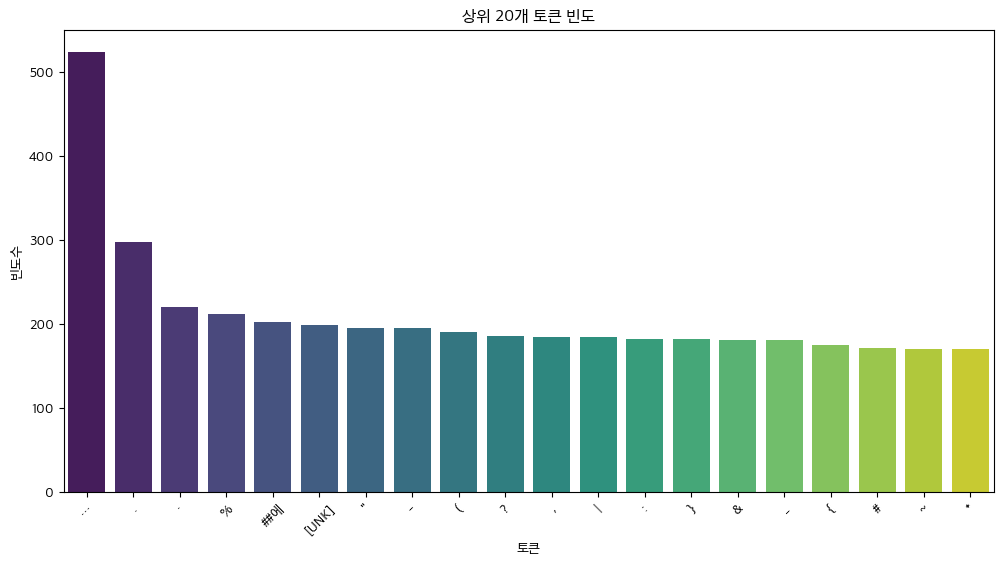

In [7]:
all_tokens = [token for tokens in df_alpha['tokens'] for token in tokens]
token_counts = Counter(all_tokens)

most_common_tokens = token_counts.most_common(20)
tokens, counts = zip(*most_common_tokens)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(tokens), y=list(counts), palette='viridis')
plt.title('상위 20개 토큰 빈도')
plt.xlabel('토큰')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

In [8]:
def remove_special_characters(text):
    # 정규 표현식을 사용하여 알파벳, 숫자, 한글, 공백을 제외한 모든 문자 제거
    return re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)

# 'text' 열에 특수 문자 제거 함수 적용
df['cleaned_text'] = df['text'].apply(remove_special_characters)

In [9]:
# 모든 토큰을 담을 리스트 초기화
all_tokens = []

# 각 행의 'cleaned_text'에서 토큰 추출
for text in df['cleaned_text']:
    tokens = text.split()  # 공백 기준으로 토큰화
    all_tokens.extend(tokens)

# 토큰 빈도 계산
token_counts = Counter(all_tokens)

# 상위 20개 토큰 추출
most_common_tokens = token_counts.most_common(20)
tokens, counts = zip(*most_common_tokens)

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/2321121639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


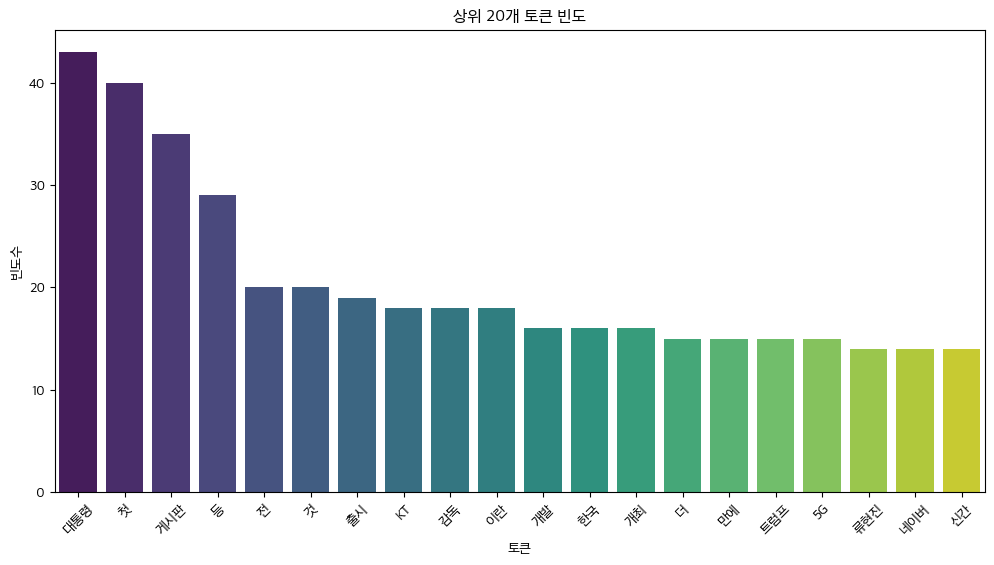

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(tokens), y=list(counts), palette='viridis')
plt.title('상위 20개 토큰 빈도')
plt.xlabel('토큰')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

In [11]:
def mapping_label(df):
    # 딕셔너리로 매핑 정의
    label_map = {
        0: '생활문화', 1: '스포츠', 2: '사회', 3: '세계',
        4: 'IT과학', 5: '경제', 6: '정치'
    }
    # map 함수를 사용하여 변환
    df['target'] = df['target'].map(label_map)
    return df

# 라벨 매핑 적용
df = mapping_label(df)

In [15]:
def clean_and_tokenize(text):
    # 특수 문자 제거
    cleaned_text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)
    # 공백 기준으로 토큰화
    tokens = cleaned_text.split()
    return tokens

# 라벨별 토큰 빈도수를 저장할 딕셔너리 초기화
label_token_counts = {}

# 각 라벨에 대해 반복
for label in df['target'].unique():
    # 해당 라벨의 텍스트 추출
    label_texts = df[df['target'] == label]['text']
    # 모든 토큰을 담을 리스트 초기화
    all_tokens = []
    # 각 텍스트에 대해 토큰화 수행
    for text in label_texts:
        tokens = clean_and_tokenize(text)
        all_tokens.extend(tokens)
    # 토큰 빈도 계산
    token_counts = Counter(all_tokens)
    # 결과 저장
    label_token_counts[label] = token_counts

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


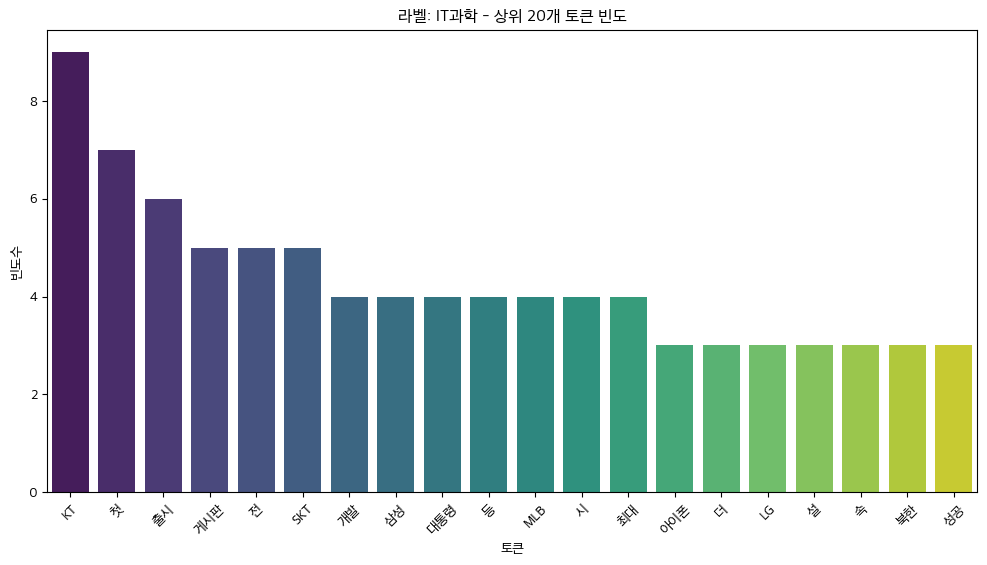

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


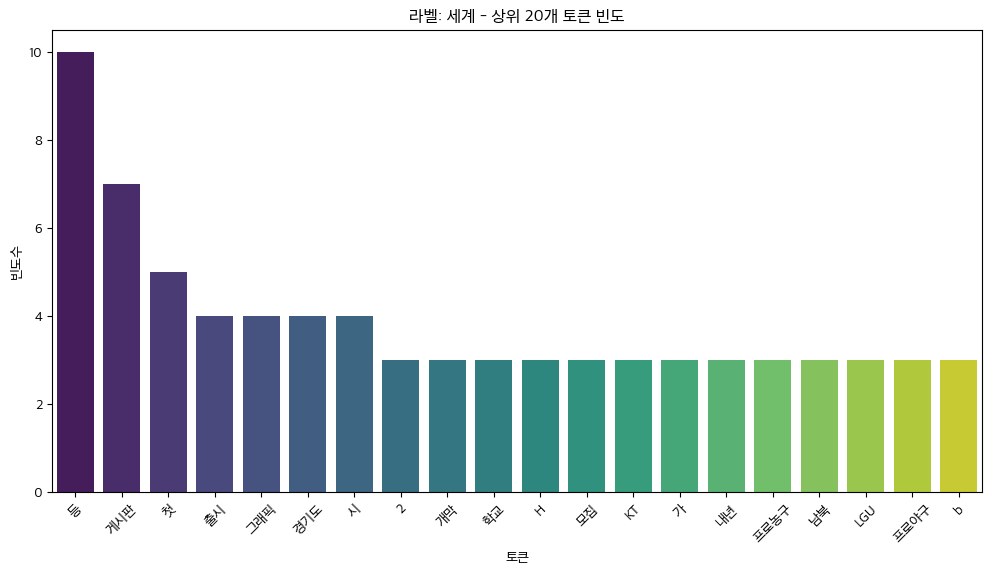

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


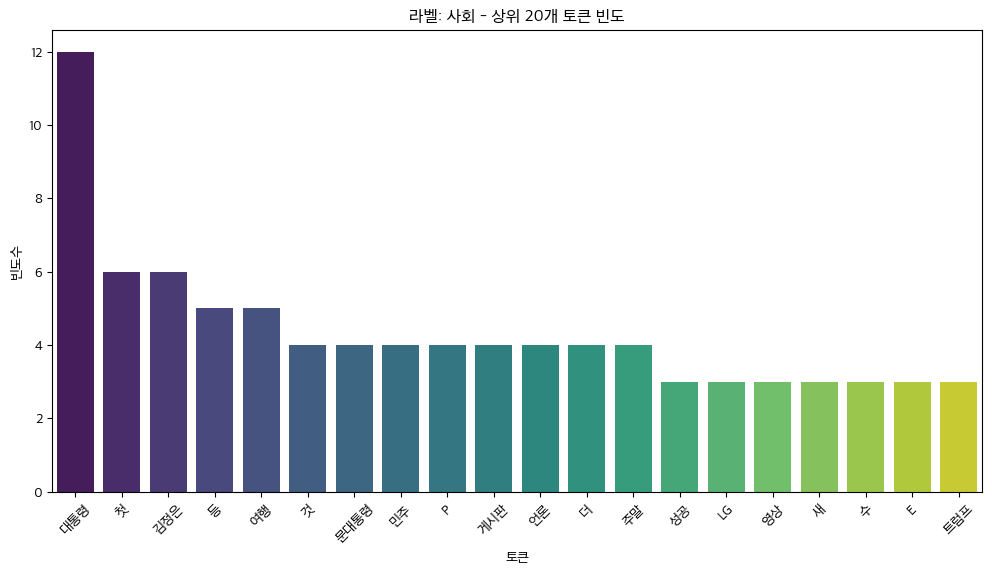

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


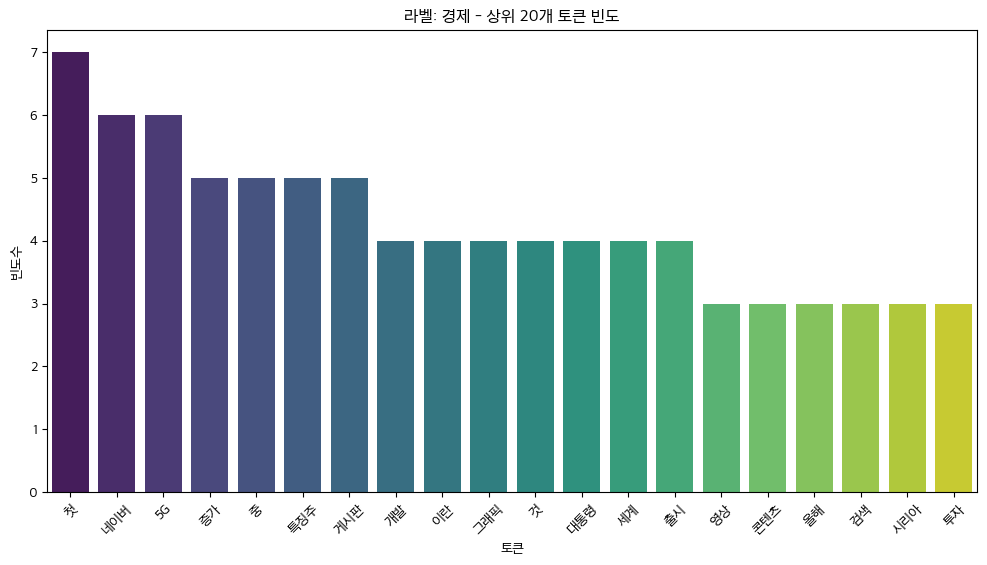

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


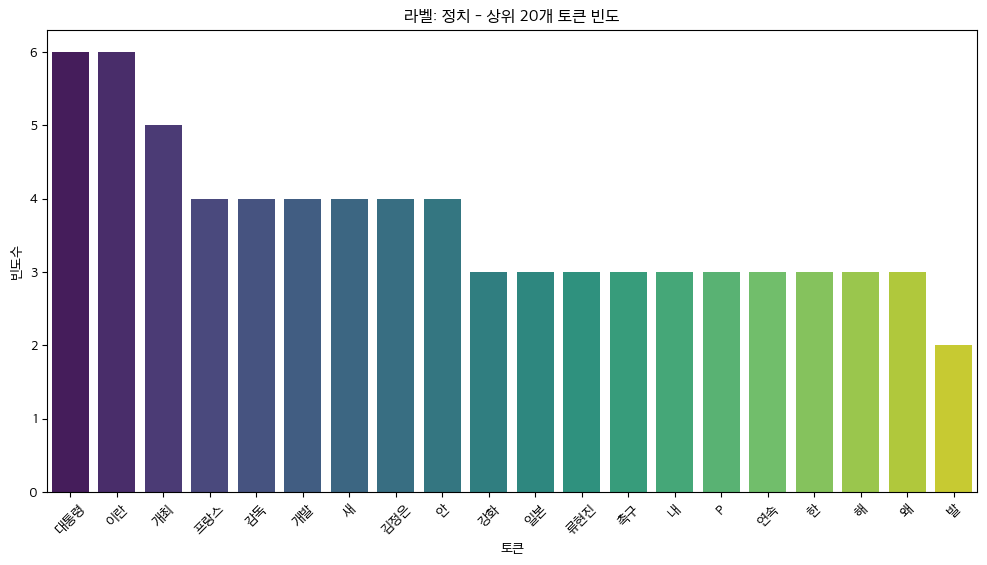

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


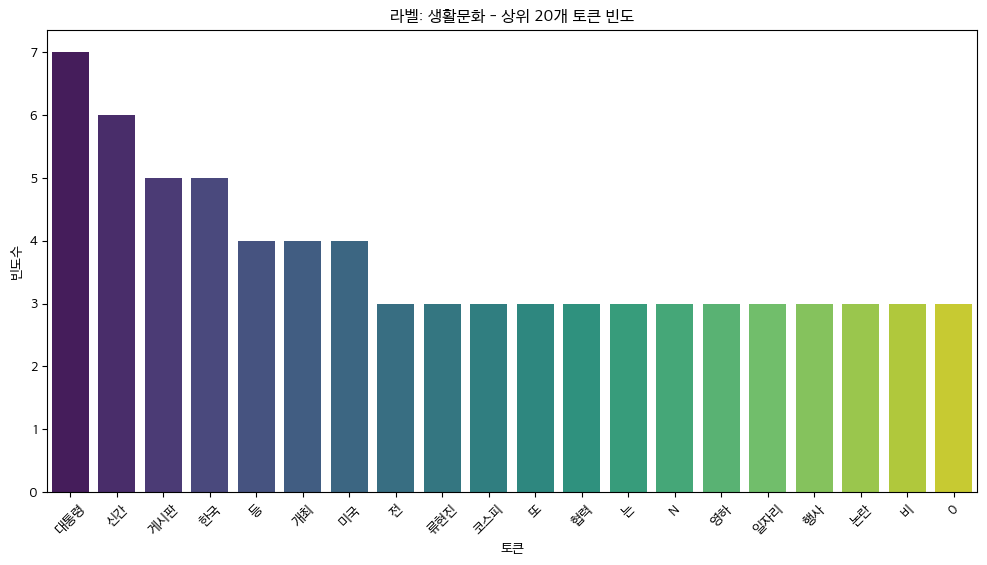

/var/folders/f9/7w3cw7_s6c7849zf1svk37000000gn/T/ipykernel_79300/3985985757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(counts), palette='viridis')


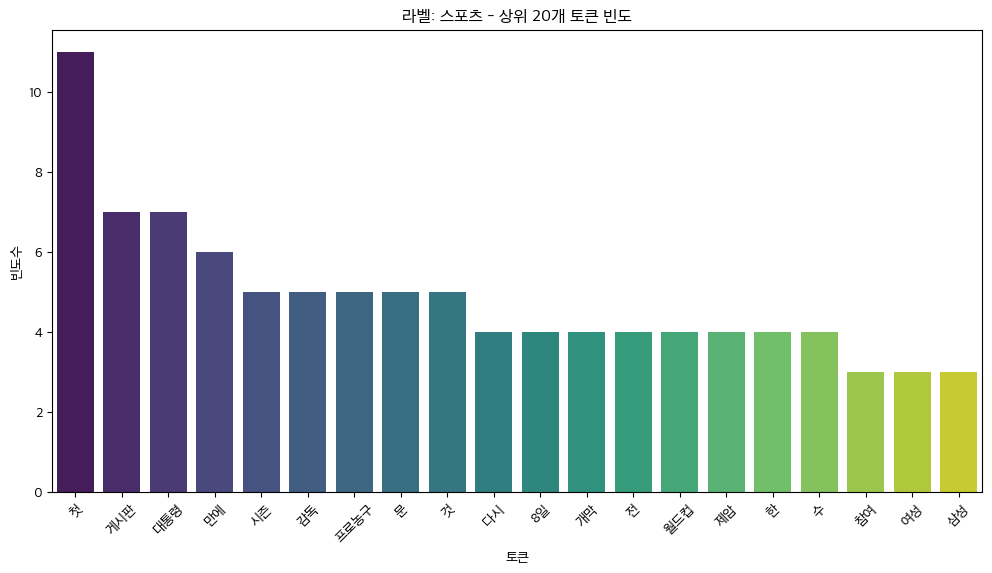

In [16]:
# 각 라벨에 대해 시각화
for label, token_counts in label_token_counts.items():
    # 상위 20개 토큰 추출
    most_common_tokens = token_counts.most_common(20)
    tokens, counts = zip(*most_common_tokens)
    # 그래프 그리기
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(tokens), y=list(counts), palette='viridis')
    plt.title(f'라벨: {label} - 상위 20개 토큰 빈도')
    plt.xlabel('토큰')
    plt.ylabel('빈도수')
    plt.xticks(rotation=45)
    plt.show()